In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros de plotagem das figuras
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 300

# Mostrar floats com duas casas decimas
pd.set_option('display.float_format',  lambda x: '%.4g' % x)
pd.options.display.max_colwidth = 20
pd.options.display.max_columns = 20
pd.options.display.max_rows = 6

In [2]:
# Load magic stocks prices
df_stocks = pd.read_csv(
    "../data/3_prices.csv", parse_dates=['datneg', 'cutoff_date', 'next_cutoff'])
df_stocks

,datneg,codneg,nomres,preult,premed,cutoff_date,next_cutoff
0,2014-04-10,ABEV3,AMBEV S/A,13.16,13.1,2014-04-10,2015-04-10
1,2014-04-11,ABEV3,AMBEV S/A,13.48,13.34,2014-04-10,2015-04-10
2,2014-04-14,ABEV3,AMBEV S/A,13.46,13.41,2014-04-10,2015-04-10
...,...,...,...,...,...,...,...
80830,2021-04-08,YDUQ3,YDUQS PART,30.28,29.8,2020-04-09,2021-04-12
80831,2021-04-09,YDUQ3,YDUQS PART,30.57,30.53,2020-04-09,2021-04-12
80832,2021-04-12,YDUQ3,YDUQS PART,30.58,30.59,2020-04-09,2021-04-12


In [3]:
# Create a column with the first price of the stock for each interval
df_stocks['first_value'] = df_stocks.groupby(
    by=['codneg', 'cutoff_date'])['premed'].transform('first')
df_stocks

,datneg,codneg,nomres,preult,premed,cutoff_date,next_cutoff,first_value
0,2014-04-10,ABEV3,AMBEV S/A,13.16,13.1,2014-04-10,2015-04-10,13.1
1,2014-04-11,ABEV3,AMBEV S/A,13.48,13.34,2014-04-10,2015-04-10,13.1
2,2014-04-14,ABEV3,AMBEV S/A,13.46,13.41,2014-04-10,2015-04-10,13.1
...,...,...,...,...,...,...,...,...
80830,2021-04-08,YDUQ3,YDUQS PART,30.28,29.8,2020-04-09,2021-04-12,26.16
80831,2021-04-09,YDUQ3,YDUQS PART,30.57,30.53,2020-04-09,2021-04-12,26.16
80832,2021-04-12,YDUQ3,YDUQS PART,30.58,30.59,2020-04-09,2021-04-12,26.16


In [4]:
# Normalize values with the first price of the stock for in each period
df_stocks['price_n'] = 100 * df_stocks['premed'] / df_stocks['first_value']
df_stocks

,datneg,codneg,nomres,preult,premed,cutoff_date,next_cutoff,first_value,price_n
0,2014-04-10,ABEV3,AMBEV S/A,13.16,13.1,2014-04-10,2015-04-10,13.1,100
1,2014-04-11,ABEV3,AMBEV S/A,13.48,13.34,2014-04-10,2015-04-10,13.1,101.8
2,2014-04-14,ABEV3,AMBEV S/A,13.46,13.41,2014-04-10,2015-04-10,13.1,102.4
...,...,...,...,...,...,...,...,...,...
80830,2021-04-08,YDUQ3,YDUQS PART,30.28,29.8,2020-04-09,2021-04-12,26.16,113.9
80831,2021-04-09,YDUQ3,YDUQS PART,30.57,30.53,2020-04-09,2021-04-12,26.16,116.7
80832,2021-04-12,YDUQ3,YDUQS PART,30.58,30.59,2020-04-09,2021-04-12,26.16,116.9


In [5]:
# Create a new dataframe with portfolio prices -> daily mean price of the megic stocks
# of the period
df_portfolio = df_stocks.groupby(by=['datneg', 'next_cutoff'])['price_n'].mean().reset_index()
df_portfolio.rename(columns={'price_n': 'price'}, inplace=True)
df_portfolio

,datneg,next_cutoff,price
0,2011-04-11,2012-04-09,100
1,2011-04-12,2012-04-09,98.75
2,2011-04-13,2012-04-09,98.3
...,...,...,...
2776,2022-06-13,2023-04-11,93.11
2777,2022-06-14,2023-04-11,91.52
2778,2022-06-15,2023-04-11,92.08


In [6]:
# Create a column for storing the last portfolio price of the period
df_portfolio['last_price'] = df_portfolio.groupby(by=['next_cutoff'])['price'].transform('last')
df_portfolio

,datneg,next_cutoff,price,last_price
0,2011-04-11,2012-04-09,100,111.2
1,2011-04-12,2012-04-09,98.75,111.2
2,2011-04-13,2012-04-09,98.3,111.2
...,...,...,...,...
2776,2022-06-13,2023-04-11,93.11,92.08
2777,2022-06-14,2023-04-11,91.52,92.08
2778,2022-06-15,2023-04-11,92.08,92.08


In [7]:
# The multiplier column will store the last price only in the last day of the group,
# making others values equal to 1
df_portfolio['multiplier'] = np.where(
    df_portfolio['datneg'] == df_portfolio['next_cutoff'],
    df_portfolio['last_price'] / 100,
    1
)
df_portfolio

,datneg,next_cutoff,price,last_price,multiplier
0,2011-04-11,2012-04-09,100,111.2,1
1,2011-04-12,2012-04-09,98.75,111.2,1
2,2011-04-13,2012-04-09,98.3,111.2,1
...,...,...,...,...,...
2776,2022-06-13,2023-04-11,93.11,92.08,1
2777,2022-06-14,2023-04-11,91.52,92.08,1
2778,2022-06-15,2023-04-11,92.08,92.08,1


In [8]:
# Calculate the product in the multiplier column and store it in 
# 'acumm_adjustment' column
df_portfolio['accum_adjustment'] = df_portfolio['multiplier'].cumprod() 
# Check values in first annual portfolio transition
df_portfolio[246:251]

,datneg,next_cutoff,price,last_price,multiplier,accum_adjustment
246,2012-04-04,2012-04-09,112.2,111.2,1,1
247,2012-04-05,2012-04-09,113,111.2,1,1
248,2012-04-09,2012-04-09,111.2,111.2,1.112,1.112
249,2012-04-09,2013-04-10,100,116.9,1,1.112
250,2012-04-10,2013-04-10,99.25,116.9,1,1.112


In [9]:
df_portfolio['accum_price'] = df_portfolio['price'] * df_portfolio['accum_adjustment']
# Check values in first annual portfolio transition
df_portfolio[246:251]

,datneg,next_cutoff,price,last_price,multiplier,accum_adjustment,accum_price
246,2012-04-04,2012-04-09,112.2,111.2,1,1,112.2
247,2012-04-05,2012-04-09,113,111.2,1,1,113
248,2012-04-09,2012-04-09,111.2,111.2,1.112,1.112,123.6
249,2012-04-09,2013-04-10,100,116.9,1,1.112,111.2
250,2012-04-10,2013-04-10,99.25,116.9,1,1.112,110.4


In [10]:
# In porfolio transitions days, there will be two rows with equal trade day ('datneg')
# and two cutoff days. The second row holds already the portfolio gain from previuos
# period since is being multiplied by 'accum_adjustment' column.
# Therefore, only the second row should be kept.
df_portfolio.drop_duplicates('datneg', keep='last', inplace=True, ignore_index=True)
df_portfolio[247:250]

,datneg,next_cutoff,price,last_price,multiplier,accum_adjustment,accum_price
247,2012-04-05,2012-04-09,113,111.2,1,1,113
248,2012-04-09,2013-04-10,100,116.9,1,1.112,111.2
249,2012-04-10,2013-04-10,99.25,116.9,1,1.112,110.4


In [11]:
# Load IBOV series
# s3://aq-dl/HistoricalQuotations/base_adj.feather
file_path = "/mnt/aq_disk/data/HistoricalQuotations/processed/base_adj.feather"
df_ibov = (pd
    .read_feather(file_path)
    .query('codneg == "IBOV" and datneg >= "2011-04-11"')
    [['datneg', 'premed']]
)
df_ibov.reset_index(drop=True, inplace=True)
df_ibov

,datneg,premed
0,2011-04-11,6.852e+04
1,2011-04-12,6.748e+04
2,2011-04-13,6.676e+04
...,...,...
2764,2022-06-14,1.023e+05
2765,2022-06-15,1.027e+05
2766,2022-06-17,1.007e+05


In [12]:
# Normalize values with the first price of the stock for in each period
df_ibov.premed = 100 * df_ibov.premed / df_ibov.loc[0, 'premed']
df_ibov

,datneg,premed
0,2011-04-11,100
1,2011-04-12,98.48
2,2011-04-13,97.43
...,...,...
2764,2022-06-14,149.3
2765,2022-06-15,149.9
2766,2022-06-17,147


In [13]:
# Merge the two dataframes and change price names for plotting
df_portfolio = df_portfolio.merge(right=df_ibov, how='inner')
df_portfolio.rename(
    columns={"accum_price": "MagicFormula", "premed": "Ibovespa"}, inplace=True)
df_portfolio.set_index('datneg', inplace=True)
# Remove columns with intermediate calculations.
df_portfolio.drop(
    columns=['price', 'last_price', 'multiplier', 'accum_adjustment'], inplace=True)
df_portfolio

,next_cutoff,MagicFormula,Ibovespa
datneg,,,
2011-04-11,2012-04-09,100,100
2011-04-12,2012-04-09,98.75,98.48
2011-04-13,2012-04-09,98.3,97.43
...,...,...,...
2022-06-13,2023-04-11,255,151.5
2022-06-14,2023-04-11,250.7,149.3
2022-06-15,2023-04-11,252.2,149.9


<AxesSubplot:xlabel='datneg'>

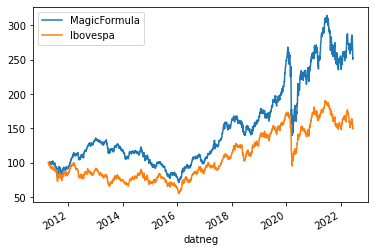

In [15]:
# Simple plot
df_portfolio[['MagicFormula', 'Ibovespa']].plot()

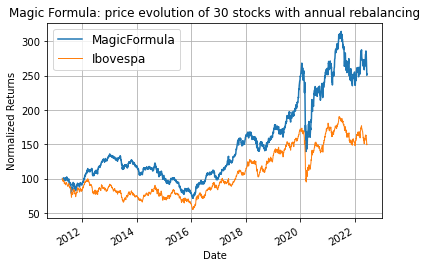

In [16]:
# Adjusted plot
df_portfolio['MagicFormula'].plot(linestyle='-', label='MagicFormula')
df_portfolio['Ibovespa'].plot(linestyle='-', linewidth = '1', label='Ibovespa')
plt.title('Magic Formula: price evolution of 30 stocks with annual rebalancing')
plt.ylabel('Normalized Returns')
plt.xlabel('Date')
# plt.yscale('log')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.savefig('../images/magic_ibov.jpg', dpi=300, transparent=False)